<a href="https://colab.research.google.com/github/proninivandm/tasks/blob/main/profi_ru_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

In [112]:
def plot_res():
  fig, ax = plt.subplots(figsize = (15, 9))
  ax.clear()
  x = np.linspace(-5, 5, 500)
  ax.plot(x, t.pdf(x, df=N-1))
  ax.vlines(interval, 0, 0.4, color='g', lw=2 )
  x_le_T, x_ge_T = x[x<=interval[0]], x[x>=interval[1]]
  ax.fill_between(x_le_T, t.pdf(x_le_T, N-1), np.zeros(len(x_le_T)), alpha=0.3, color='b' )
  ax.fill_between(x_ge_T, t.pdf(x_ge_T, N-1), np.zeros(len(x_ge_T)), alpha=0.3, color='b')

In [113]:
def plot_res2():
  fig, ax = plt.subplots(figsize = (15, 9))
  ax.clear()
  x = np.linspace(interval[0]-0.005, interval[0]+0.005, 500)
  ax.plot(x, t.pdf(x, df=N-1))
  ax.vlines(interval[0], 0, 0.1, color='g', lw=2 )
  ax.vlines(t_val(N), 0, 0.1, color='r', lw=2 )
  x_le_T, x_ge_T = x[x<interval[0]], x[x>interval[1]]
  ax.fill_between(x_le_T, t.pdf(x_le_T, N-1), np.zeros(len(x_le_T)), alpha=0.3, color='b' )
  ax.fill_between(x_ge_T, t.pdf(x_ge_T, N-1), np.zeros(len(x_ge_T)), alpha=0.3, color='b')

"Можем сказать" понятие неоднозначное, поэтому для такой задачи необходимо задаться уровнем значимости, то есть числом, которое определяет вероятность ошибки 1 рода (когда говорим, что монета "нечестная", а она на самом деле честная).

In [106]:
print('Введите уровень значимости')
alpha = float(input('alpha = '))

Введите уровень значимости
alpha = 0.01


Выпадений орлов на 10% больше, то есть: "x + 1.1x = 1"

Отсюда

In [107]:
p_orl = 11/21
p_resh = 10/21

Пусть выпадение орла эквивалентно выпадению числа 0, решка - соответственно 1. Бернулли.

Тогда можем посчитать матожидание нашей монетки, ее выборочную дисперсию, найти значение t-статистики и построить доверительный интервал, который будет зависеть от уровня значимости и числа наблюдений.

Статистика есть, в начале зафиксировали уровень значимости, теперь можем найти минимальное количество испытаний, при котором t-value попадет в критическую область (область, в которой отвергается нулевая гипотеза о том, что монета честная). Эта область двусторонняя (может быть перевес как в сторону решки, так и в сторону орла).

При увеличении числа испытаний наша уверенность в истинности принятого решения будет только увеличиваться, поэтому ответ - это любое число N, большее N_min

In [108]:
E_x = p_resh

In [109]:
def t_val(n):
  return (E_x-0.5)/np.sqrt(p_resh*p_orl/(n-1))

Пойдем снизу вверх - будем увеличивать N пока наше t-value не попадет в критическую область. N-1 в функции t-статистики - это число степеней свободы.

In [110]:
N=2
while(t.interval(1-alpha, N-1)[0]<=t_val(N)<=t.interval(1-alpha, N-1)[1]):
  N+=1
interval = t.interval(1-alpha, N-1)
print(f'Минимальное число наблюдений, при котором можем сказать, что монета нечестная: {N}')
print(f'При этом доверительный интервал {interval}, а значение статистики {t_val(N)}')

Минимальное число наблюдений, при котором можем сказать, что монета нечестная: 2925
При этом доверительный интервал (-2.5775117831945846, 2.5775117831945846), а значение статистики -2.57787791515707


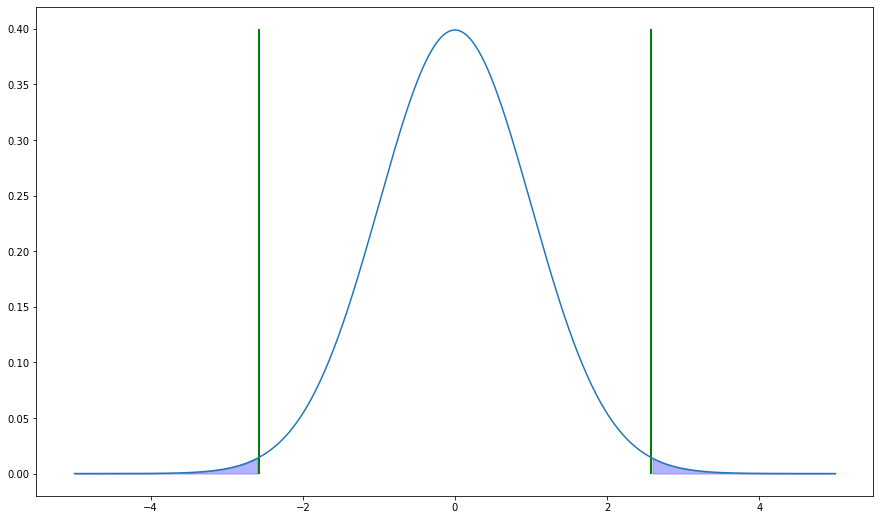

In [114]:
plot_res()

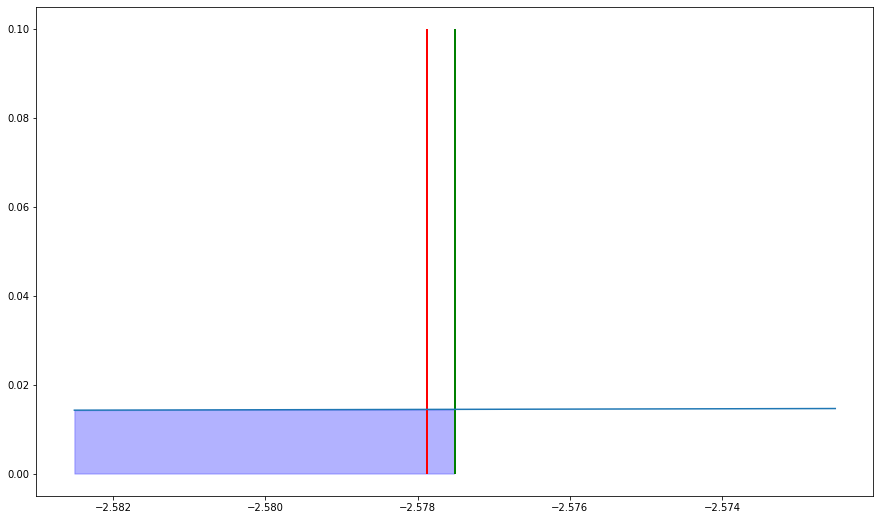

In [115]:
plot_res2()